## EDA
- EDA IS Analyze and Summarize

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import dataset
df = sns.load_dataset('titanic')

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# no need to these code of line because we have already checked shape and dtypes by use df.info()
# df.shape
# df.dtypes

In [7]:
# summarize (sumary statistics)
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# find null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# finding number of unique values in each column
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: >

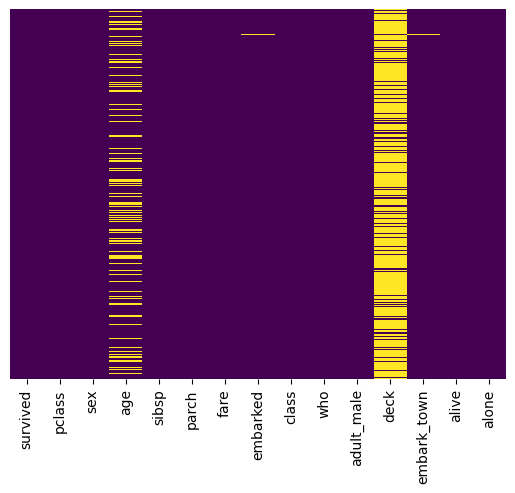

In [11]:
# visualization the nan value in heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
df.drop(columns='deck', inplace=True)  # drop 'deck' column

In [13]:
df.shape

(891, 14)

<Axes: xlabel='survived', ylabel='count'>

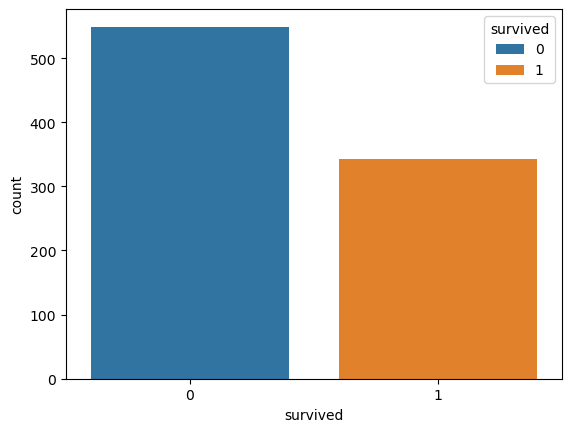

In [14]:
# visualize and explore
sns.countplot(data=df, x='survived', hue='survived')

<Axes: xlabel='survived', ylabel='age'>

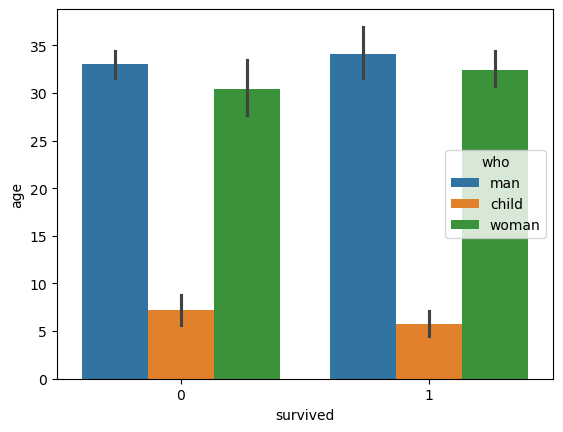

In [15]:
sns.barplot(data=df, x='survived',y="age", hue="who")

<Axes: xlabel='class', ylabel='count'>

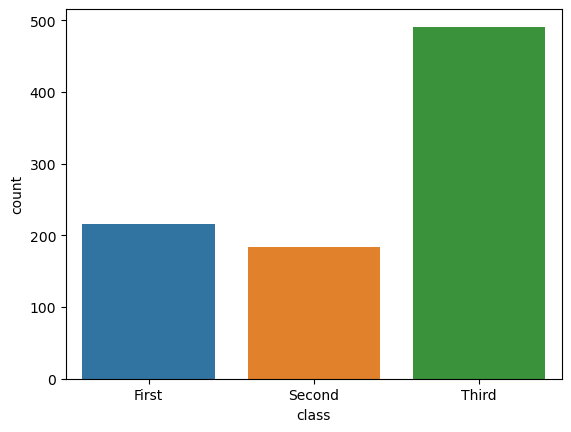

In [16]:
sns.countplot(data=df, x="class", hue="class")

<Axes: xlabel='age', ylabel='Count'>

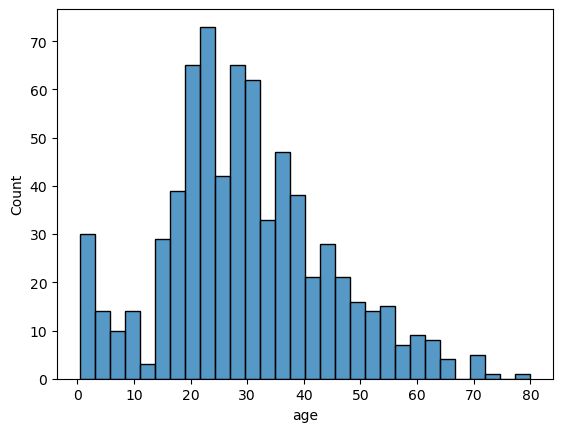

In [17]:
# data distribution
sns.histplot(data=df, x='age', bins=30)

<Axes: >

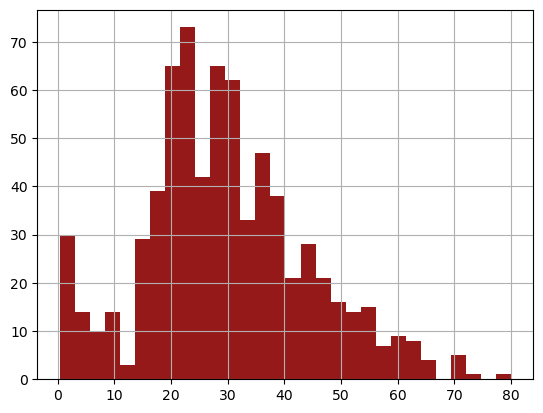

In [18]:
df["age"].hist(bins=30, color='darkred', alpha=0.9)

<Axes: xlabel='survived', ylabel='age'>

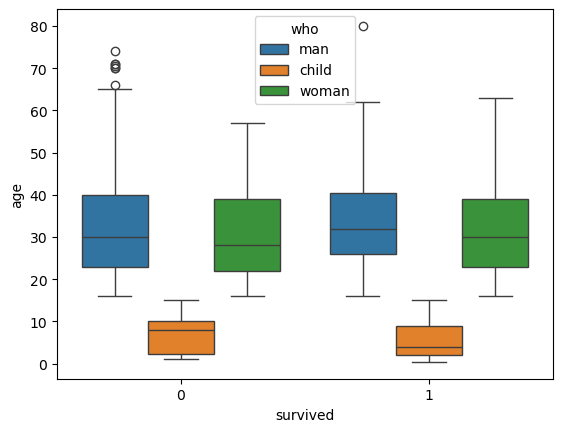

In [19]:
sns.boxplot(data=df, y = "age", x = "survived", hue = "who")

(0.0, 300.0)

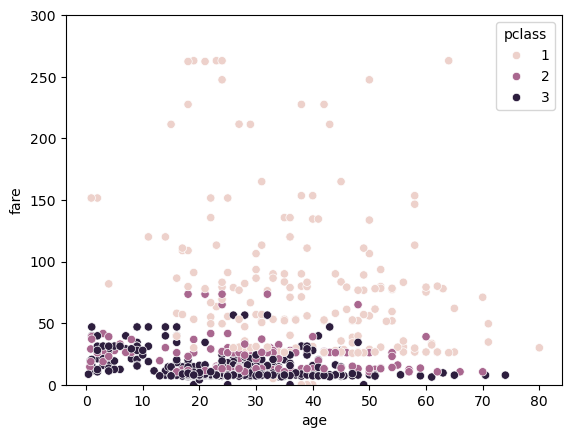

In [28]:
#scatter plot
sns.scatterplot(x='age',y='fare',data=df, hue='pclass')
plt.ylim(0, 300)  # set y-axis limits for better visibility

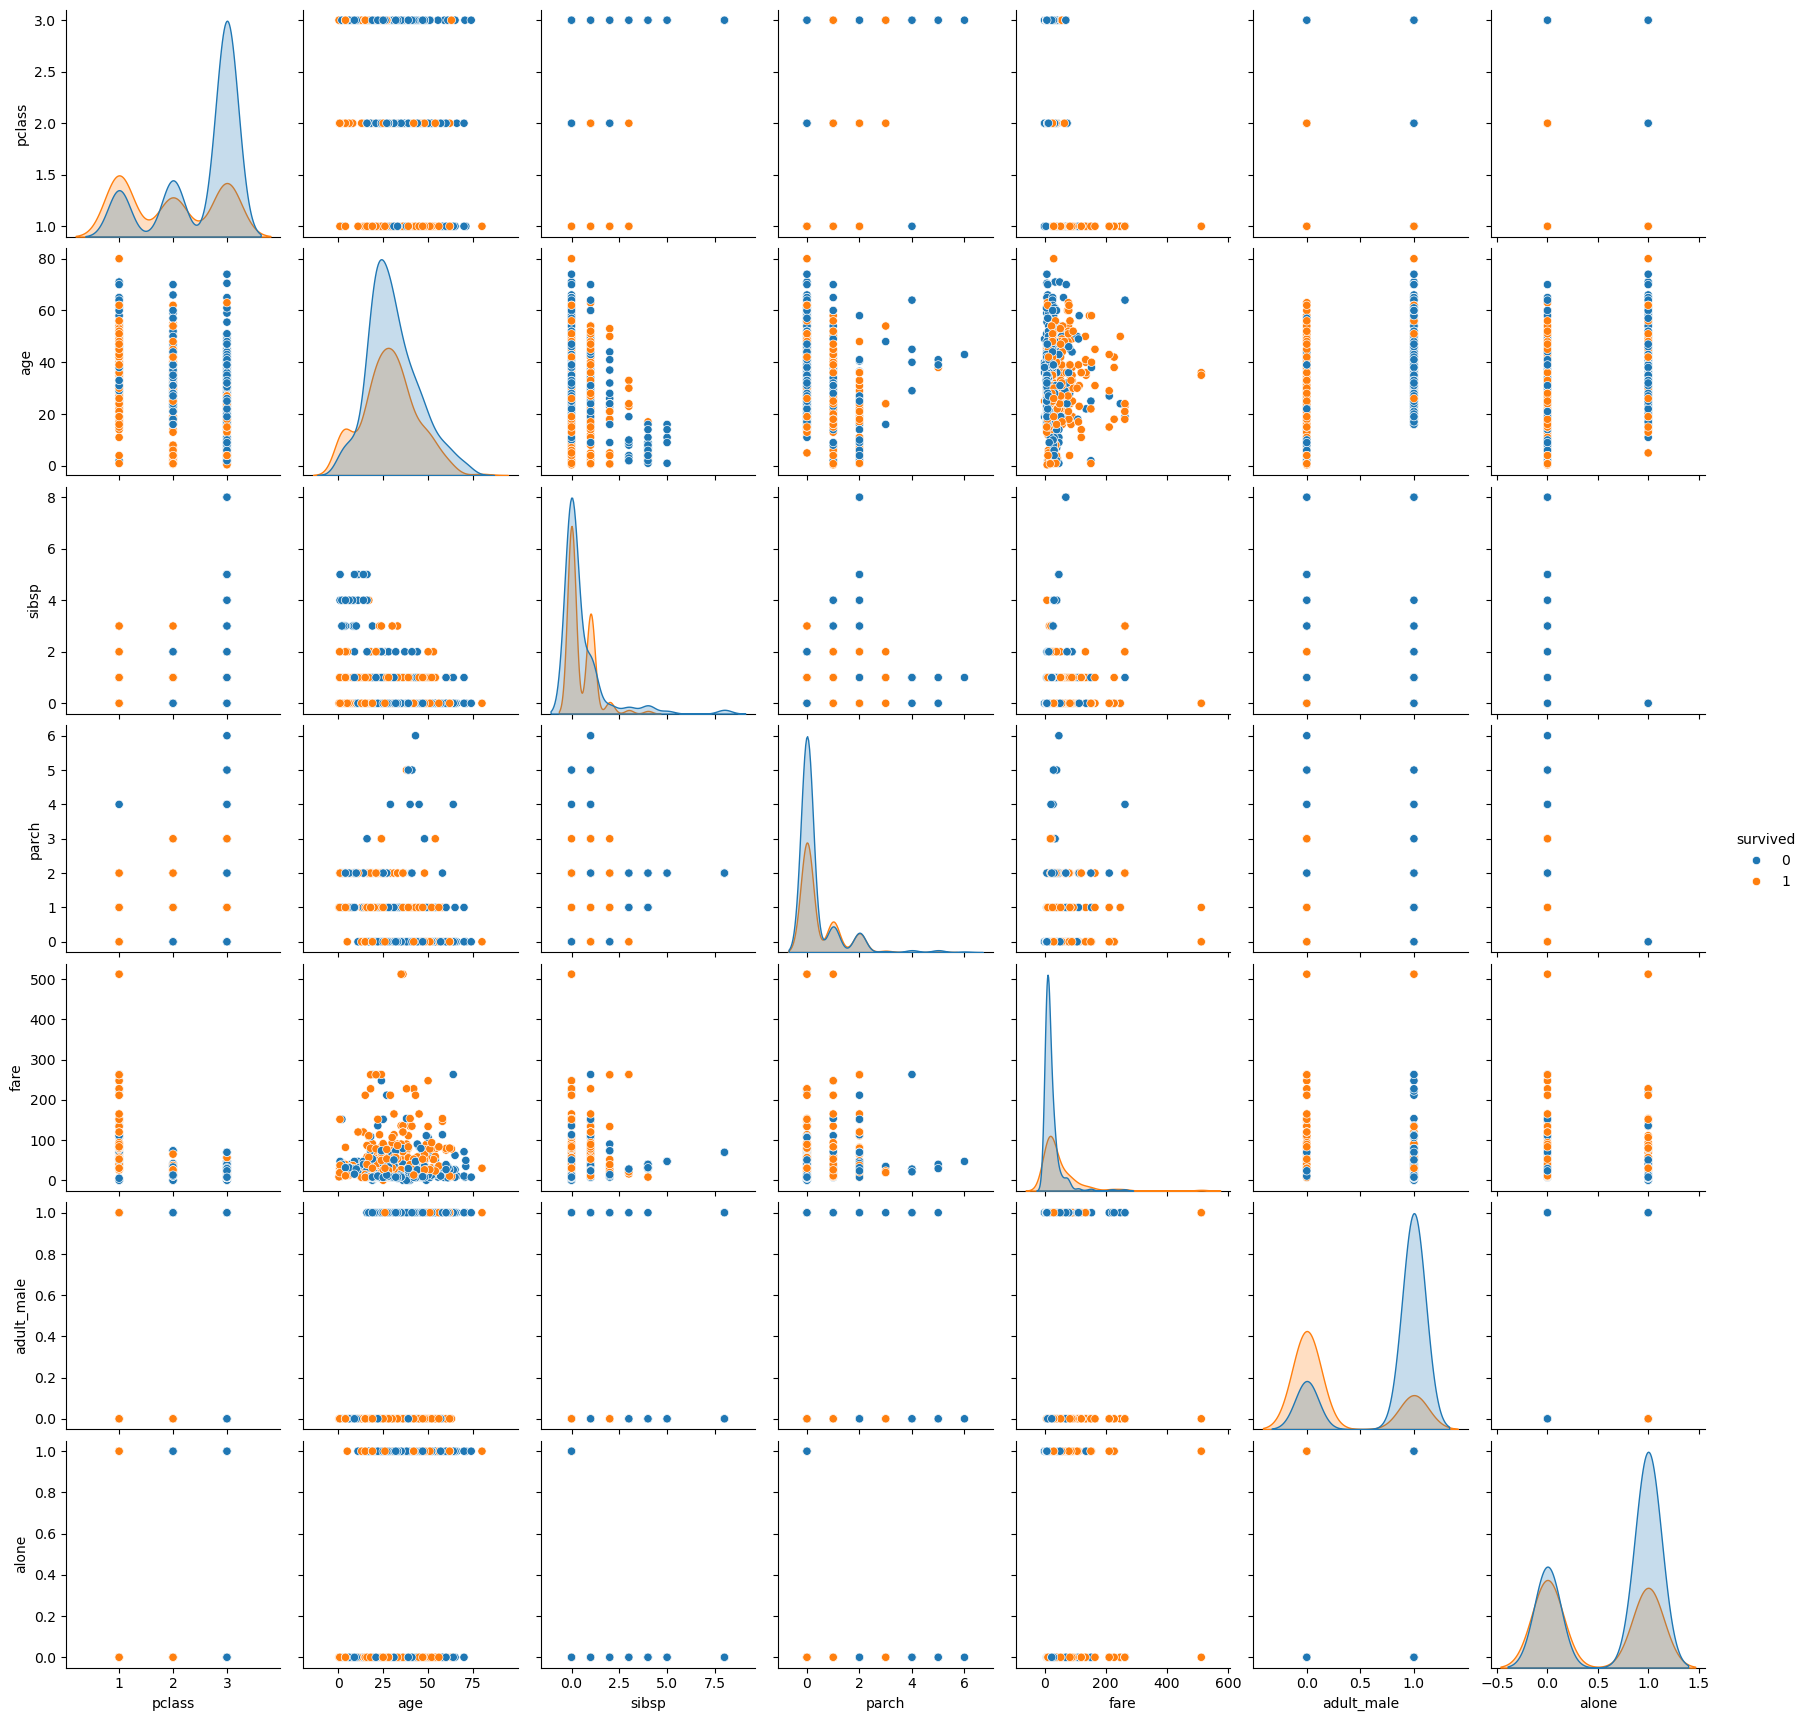

In [29]:
sns.pairplot(df, hue="survived")

<Axes: xlabel='pclass'>

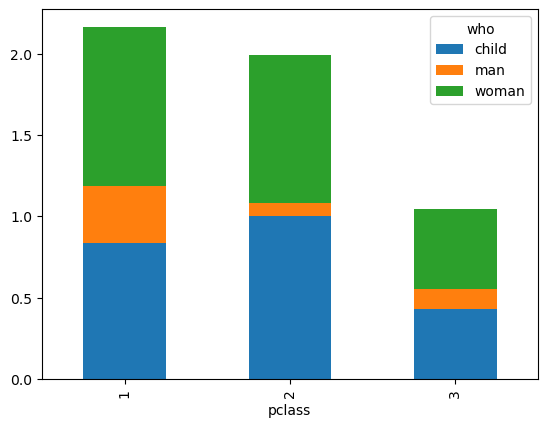

In [31]:
# stacked bar plot
df.groupby(['pclass', 'who'])['survived'].mean().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='survived', ylabel='age'>

c:\Users\Kamran\miniconda3\envs\data_analysis\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


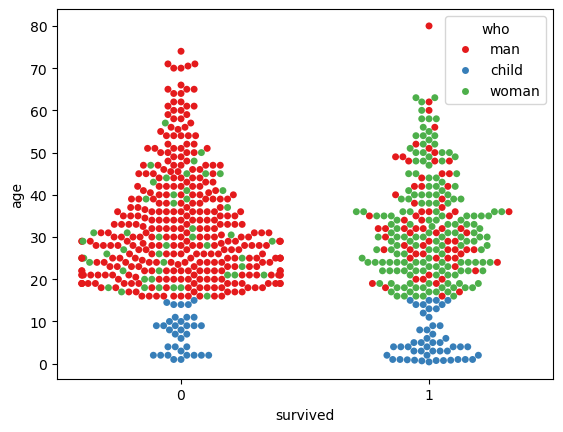

In [37]:
# swarm plot
sns.swarmplot(x='survived',y='age',data=df, hue='who', palette='Set1')

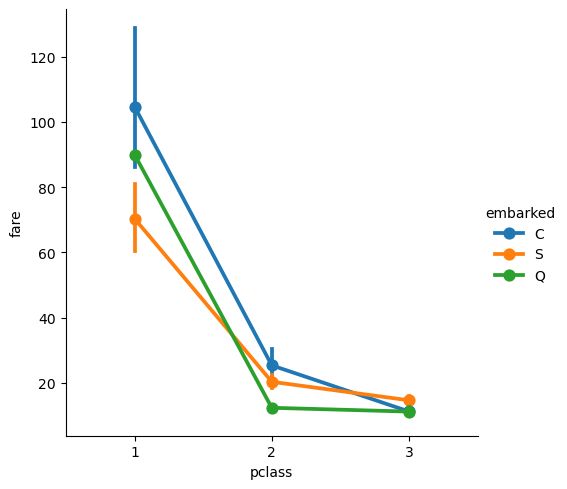

In [40]:
sns.catplot(x='pclass',y='fare',data=df, kind='point', hue='embarked')

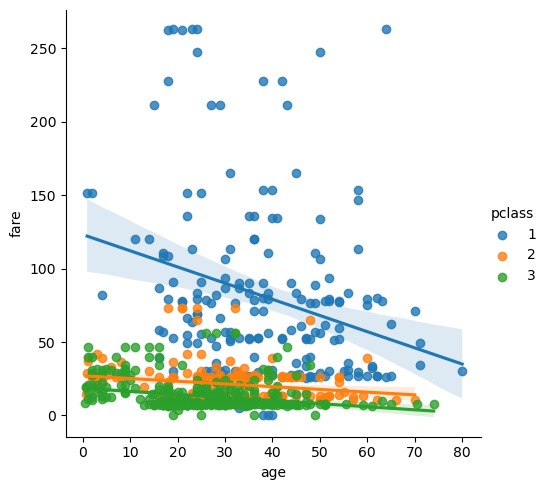

In [44]:
# relation of two numerical variables
sns.lmplot(data=df[df['fare'] < 300], x = "age", y="fare", hue="pclass")

In [45]:
# how to add a column and make a age group
bins = [0, 10, 18, 30, 50, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [46]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [47]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_group'],
      dtype='object')

C:\Users\Kamran\AppData\Local\Temp\ipykernel_8336\1314158953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['fare'].mean().plot(kind='bar')


<Axes: xlabel='age_group'>

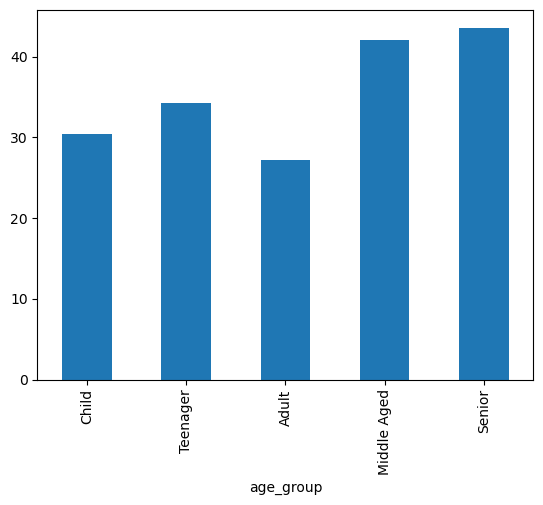

In [49]:
df.groupby('age_group')['fare'].mean().plot(kind='bar')

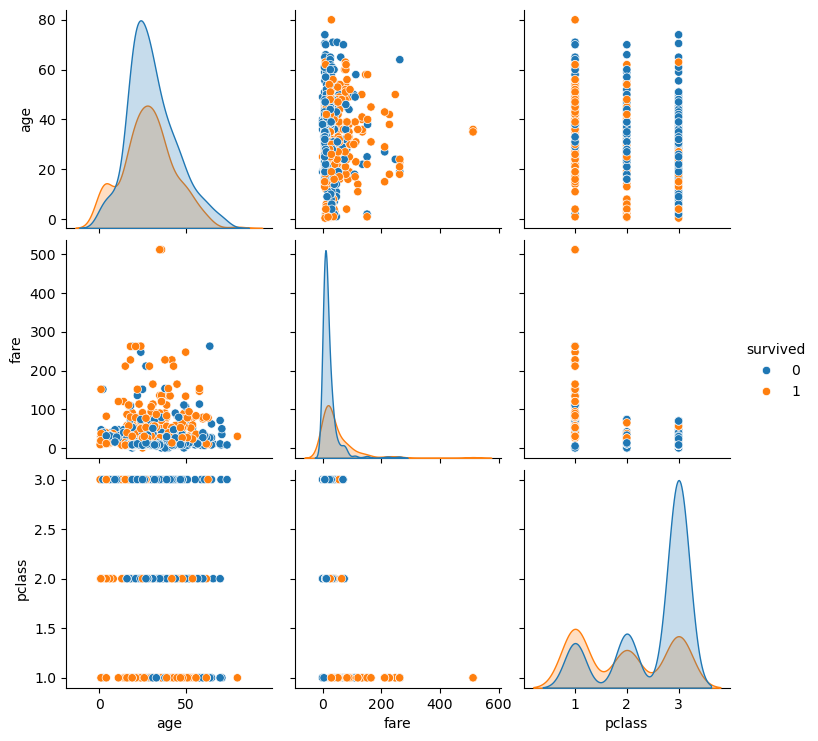

In [50]:
sns.pairplot(df,hue='survived', vars=['age', 'fare', 'pclass'])

In [51]:
# add column family size